In [49]:
import matplotlib.pyplot as plt

In [1]:
import vpython as vp

ball = vp.sphere(pos = vp.vector(0,5,0), radius = 1, color = vp.color.yellow)
floor = vp.box(pos = vp.vector(0,-5,0), length = 8, height = 0.2, width = 4)

h = 0.01
v = 0.0

while (True):
    vp.rate(400)
    ball.pos.y = ball.pos.y + v * h
    if (ball.pos.y > floor.pos.y + ball.radius):
        v = v - 9.8 * h
    else:
        v = -v

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

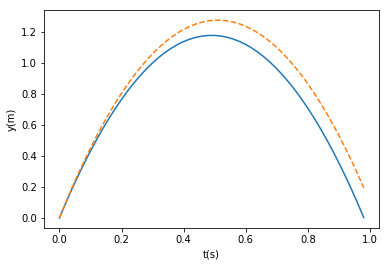

In [1]:
import matplotlib.pyplot as plt

g, h = 9.8, 0.02
y, v0 = 0.0, 5.0
ta, ya = [], []
t, yb = 0.0, []

while t < 1.0:
    ta.append(t)
    ya.append(y)
    yb.append(v0*t - g*t*t/2.0)
    #v = v0 - g*t
    #y = y + v*h
    t = t + h
    k1 = h*(v0 - g*t)
    k2 = h*(v0 - g*(t + h/2.0))
    y = y + k2
    
plt.figure()
plt.plot(ta, ya, ta, yb, '--')
plt.xlabel('t(s)')
plt.ylabel('y(m)')
plt.show()

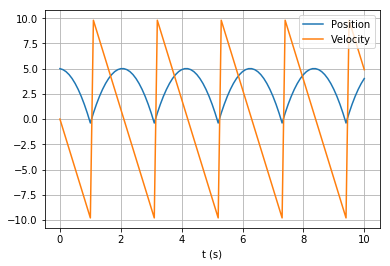

In [50]:
t, y, v = 0.0, 5.0, 0.0
ta, ya, va = [], [], []
h = 0.1

while (t < 10.0):
    ta.append(t)
    ya.append(y)
    va.append(v)
    
    if (y > 0):
        v = v - 9.8*h
    else:
        v = -v
    
    y = y + v*h
    t = t + h
    
plt.figure()
plt.plot(ta, ya, label='Position')
plt.plot(ta, va, label='Velocity')
plt.xlabel('t (s)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [61]:
from sympy import *

t, lamb = symbols('t lamb', positive = True)
tau = integrate(exp(-lamb*t),(t,0,oo))
print('Tau: ',tau)

Tau:  1/lamb


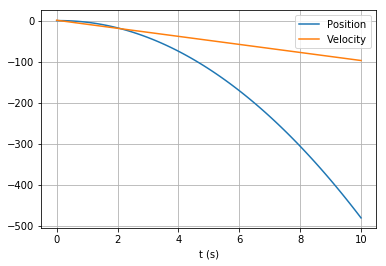

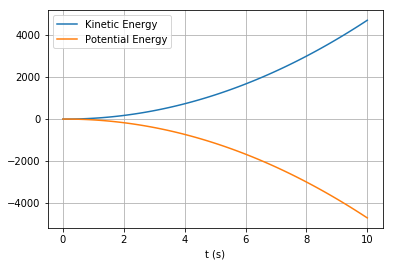

In [27]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

g = 9.8
m = 1


def freefall(y, t):
    dydt = np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = -g
    
    return dydt

def go(v0):
    y0 = [0.0, v0]
    t = np.linspace(0,10,100)
    
    y = odeint(freefall, y0, t)
    
    K = 0.5*m*y[:,1]**2
    U = m*g*y[:,0]
   
    plt.figure()
    plt.plot(t, y[:,0], label='Position')
    plt.plot(t, y[:,1], label='Velocity')
    plt.xlabel('t (s)')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(t, K, label='Kinetic Energy')
    plt.plot(t, U, label='Potential Energy')
    plt.xlabel('t (s)')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

go(1.0)